In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

Wariant 12


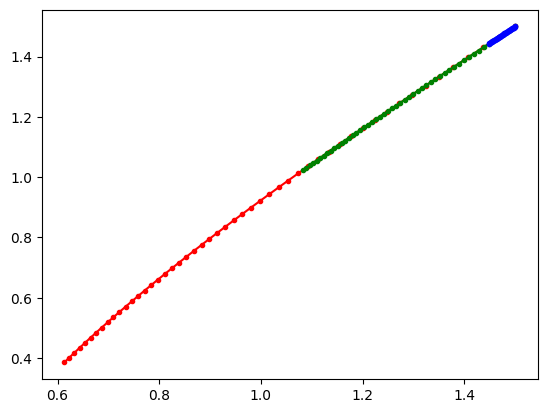

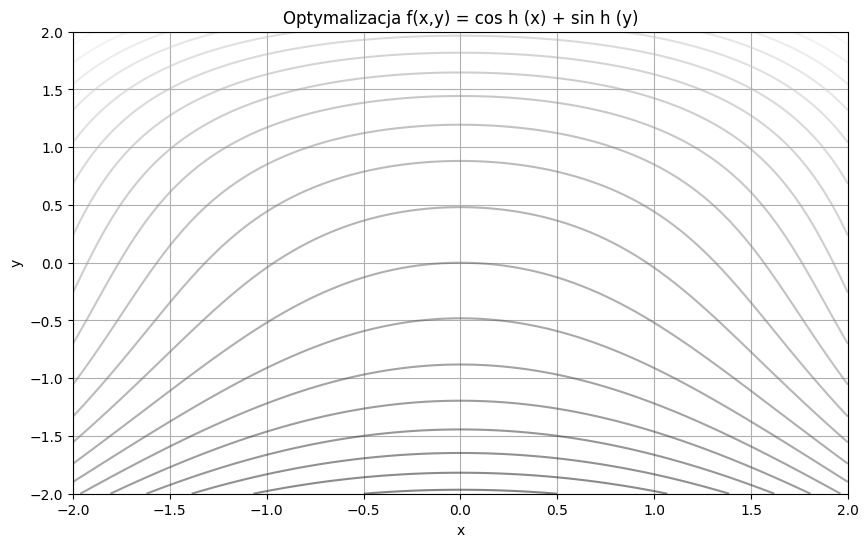

In [ ]:
def fn(x, y):
    return np.cosh(x) + np.sinh(y)

def gradient(x, y):
    dx = np.sinh(x)
    dy = np.cosh(y)  
    return np.array([dx, dy])

def optimize(eta, steps=50):
    pos = np.array([1.5, 1.5])
    path = [pos.copy()]

    for _ in range(steps):
        grad = gradient(pos[0], pos[1])
        pos = pos - eta * grad
        path.append(pos.copy())
    return np.array(path)


learning_rates = [0.015, 0.005, 0.0005]

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = fn(X, Y)

colors = ["r", "g", "b"]
for lr, color in zip(learning_rates, colors):
    path = optimize(lr)
    plt.plot(path[:, 0], path[:, 1], "o-", label=f"η = {lr}", color=color, markersize=3)

print("Wariant 12")
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20, cmap="gray", alpha=0.5)
plt.title("Optymalizacja f(x,y) = cos h (x) + sin h (y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def create_model(optimizer):
    model = models.Sequential(
        [
            layers.Input(shape=(784,)),
            layers.Dense(128, activation="relu", name="Warstwa_1"),
            layers.Dense(64, activation="relu", name="Warstwa_2"),
            layers.Dense(10, activation="softmax", name="Warstwa_wyj"),
        ]
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


optimizers = {
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "GradientDescent": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
}

for name, opt in optimizers.items():
    print(f"\nTrening: {name}")

    model = create_model(opt)

    log_dir = f"logs/12/{name}_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir, histogram_freq=1
    )

    model.fit(
        x_train,
        y_train,
        epochs=10,
        batch_size=32,  # ← mini-batch SGD
        validation_data=(x_test, y_test),
        callbacks=[tensorboard_callback],
    )

    print(f"Logi zapisane w: {log_dir}")


Trening: Adam
Epoch 1/10
 249/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7156 - loss: 1.0050

KeyboardInterrupt: 